In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
pd.options.display.max_columns = 1000
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

/anaconda3/envs/graphics2/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('/Users/ankushgarg/Documents/Social Network Analysis/datasets/movie_metadata.csv')

In [3]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
new = df.dropna()

In [5]:
X = new[['num_critic_for_reviews','duration','director_facebook_likes', 'actor_3_facebook_likes','actor_1_facebook_likes', 'gross',
   'num_voted_users', 'cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','budget','actor_2_facebook_likes',
    'aspect_ratio', 'movie_facebook_likes']]

y = new[['imdb_score']]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
lin_reg = LinearRegression()

In [8]:
lin_model = lin_reg.fit(X_train, y_train)

In [9]:
pred = lin_model.predict(X_test)

In [10]:
error = np.sqrt(mean_squared_error(y_test,pred))

In [11]:
print(error)

0.8937857710456045


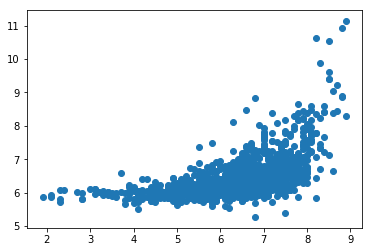

In [12]:
plt.scatter(y_test, pred)

In [13]:
diff = y_test - pred

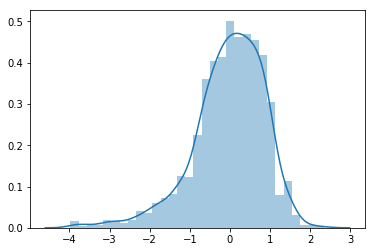

In [14]:
sns.distplot(diff)

### random forest

In [15]:
rf_1 = RandomForestRegressor()
rf_1_fit = rf_1.fit(X_train, y_train)
rf_preds = rf_1_fit.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, rf_preds))
print(error)

0.7674000933188674


/anaconda3/envs/graphics2/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [16]:
n_trees=200
model=ensemble.GradientBoostingRegressor(loss='ls',learning_rate=0.03,n_estimators=n_trees,max_depth=4)
model.fit(X_train,y_train)
pred=model.predict(X_test)
# error=model.loss_(y_test,pred) ##Loss function== Mean square error
# print("MSE:%.3f" % error)
np.sqrt(mean_squared_error(y_test,pred))

/anaconda3/envs/graphics2/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7514255530299758

### Prepare edgelists for networkx

In [17]:
test_list = []
for i, j in new.iterrows():
    dir_act_1 = (str(j['director_name']) + "|" + str(j['actor_1_name']) + "|" + str(j['movie_title']))
    test_list.append(dir_act_1)
    dir_act_2 = (str(j['director_name']) + "|" + str(j['actor_2_name'])+ "|" + str(j['movie_title']))
    test_list.append(dir_act_2)
    dir_act_3 = (str(j['director_name']) + "|" + str(j['actor_3_name']) + "|" + str(j['movie_title']))
    test_list.append(dir_act_3)

In [18]:
labels = ['director', 'actor', 'movie_title']
edge_list = pd.DataFrame(test_list, columns= ['object'])

In [19]:
edge_list['object'] = edge_list['object'].str.strip()
edge_list['object'] = edge_list['object'].str.strip(' ')

In [20]:
edge_list['director'] = edge_list.object.str.split('|', expand= True)[0]
edge_list['actor'] = edge_list.object.str.split('|', expand= True)[1]
edge_list['movie_title'] = edge_list.object.str.split('|', expand= True)[2]

In [21]:
edge_list.drop('object', inplace = True, axis = 1)

In [22]:
edge_list.head()

,director,actor,movie_title
0,James Cameron,CCH Pounder,Avatar
1,James Cameron,Joel David Moore,Avatar
2,James Cameron,Wes Studi,Avatar
3,Gore Verbinski,Johnny Depp,Pirates of the Caribbean: At World's End
4,Gore Verbinski,Orlando Bloom,Pirates of the Caribbean: At World's End


In [23]:
G = nx.from_pandas_dataframe(edge_list,source = 'director', target= 'actor', edge_attr= 'movie_title')

In [24]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 5925
Number of edges: 10402
Average degree:   3.5112


In [25]:
deg_cent = nx.degree_centrality(G)

max_deg_cemt = max(list(deg_cent.values()))

In [26]:
degrees = nx.degree(G)

max_deg = max(list(degrees.values()))

In [27]:
bet_cent = nx.betweenness_centrality(G)

max_bet_cent = max(list(deg_cent.values()))

In [28]:
page_rank = nx.pagerank(G)

max_page_rank = max(list(page_rank.values()))

In [29]:
df_deg_cent = pd.DataFrame.from_dict(deg_cent,orient= 'index').reset_index()
df_deg_cent.columns = ['actor','deg_cent']

In [30]:
df_degrees = pd.DataFrame.from_dict(degrees,orient= 'index').reset_index()
df_degrees.columns = ['actor','degrees']

In [31]:
df_bet_cent = pd.DataFrame.from_dict(bet_cent,orient= 'index').reset_index()
df_bet_cent.columns = ['actor','bet_cent']

In [32]:
df_page_rank = pd.DataFrame.from_dict(page_rank,orient= 'index').reset_index()
df_page_rank.columns = ['actor','page_rank']

In [33]:
network_df_values = df_deg_cent.merge(df_degrees, on = 'actor').merge(df_bet_cent, on = 'actor').merge(df_page_rank, on = 'actor')

In [34]:
network_df_values.head()

,actor,deg_cent,degrees,bet_cent,page_rank
0,James Cameron,0.003038,18,0.005570,0.000678
1,CCH Pounder,0.001013,6,0.000998,0.000229
2,Joel David Moore,0.000675,4,0.000896,0.000164
3,Wes Studi,0.001013,6,0.000579,0.000217
4,Gore Verbinski,0.002194,13,0.003145,0.000415


In [35]:
test = new.merge(network_df_values, how = 'left', left_on= 'director_name', right_on = 'actor')
test = test.merge(network_df_values, how = 'left', left_on= 'actor_1_name', right_on = 'actor')
test = test.merge(network_df_values, how = 'left', left_on= 'actor_2_name', right_on = 'actor')
test = test.merge(network_df_values, how = 'left', left_on= 'actor_3_name', right_on = 'actor')
test.head(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,actor_x,deg_cent_x,degrees_x,bet_cent_x,page_rank_x,actor_y,deg_cent_y,degrees_y,bet_cent_y,page_rank_y,actor_x,deg_cent_x,degrees_x,bet_cent_x,page_rank_x,actor_y,deg_cent_y,degrees_y,bet_cent_y,page_rank_y
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,James Cameron,0.003038,18,0.005570,0.000678,CCH Pounder,0.001013,6,0.000998,0.000229,Joel David Moore,0.000675,4,0.000896,0.000164,Wes Studi,0.001013,6,0.000579,0.000217
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,Gore Verbinski,0.002194,13,0.003145,0.000415,Johnny Depp,0.003883,23,0.011143,0.000766,Orlando Bloom,0.001013,6,0.000924,0.000200,Jack Davenport,0.000506,3,0.000180,0.000118
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,Sam Mendes,0.003376,20,0.005481,0.000734,Christoph Waltz,0.001182,7,0.000934,0.000237,Rory Kinnear,0.000506,3,0.000343,0.000139,Stephanie Sigman,0.000169,1,0.000000,0.000056


In [36]:
test.columns = ['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'actor_x',
       'dir_deg_cent_x', 'dir_degrees_x', 'dir_bet_cent_x', 'dir_page_rank_x', 'act1_actor_y',
       'act1_deg_cent_y', 'act1_degrees_y', 'act1_bet_cent_y', 'act1_page_rank_y', 'act2_actor_x',
       'act2_deg_cent_x', 'act2_degrees_x', 'act2_bet_cent_x', 'act2_page_rank_x', 'act3_actor_y',
       'act3_deg_cent_y', 'act3_degrees_y', 'act3_bet_cent_y', 'act3_page_rank_y']

### Model training with networkx features

In [37]:
X = test[['num_critic_for_reviews','duration','director_facebook_likes', 'actor_3_facebook_likes','actor_1_facebook_likes',
          'gross','num_voted_users', 'cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','budget',
          'actor_2_facebook_likes','aspect_ratio', 'movie_facebook_likes','dir_deg_cent_x', 'dir_degrees_x', 'dir_bet_cent_x', 
          'dir_page_rank_x','act1_deg_cent_y','act1_degrees_y', 'act1_bet_cent_y', 'act1_page_rank_y','act2_deg_cent_x', 
          'act2_degrees_x', 'act2_bet_cent_x', 'act2_page_rank_x','act3_deg_cent_y', 'act3_degrees_y', 'act3_bet_cent_y', 
          'act3_page_rank_y']]

y = test[['imdb_score']]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
model_linreg_network = LinearRegression()

In [40]:
model_linreg_network_fit = model_linreg_network.fit(X_train, y_train)

In [41]:
predictions = model_linreg_network_fit.predict(X_test)

In [42]:
np.sqrt(mean_squared_error(y_test, predictions))

0.8944003000614342

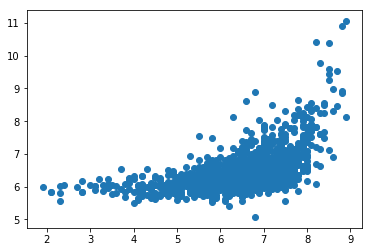

In [43]:
plt.scatter(y_test, predictions)

In [44]:
new_diff = y_test - predictions

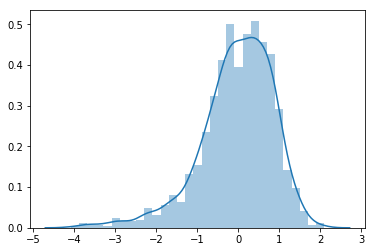

In [45]:
sns.distplot(new_diff)

In [46]:
rf_1 = RandomForestRegressor()
rf_1_fit = rf_1.fit(X_train, y_train)
rf_preds = rf_1_fit.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, rf_preds))
print(error)

/anaconda3/envs/graphics2/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.7650063250845412


In [47]:
n_trees=200
model=ensemble.GradientBoostingRegressor(loss='ls',learning_rate=0.03,n_estimators=n_trees,max_depth=4)
model.fit(X_train,y_train)
pred=model.predict(X_test)
# error=model.loss_(y_test,pred) ##Loss function== Mean square error
# print("MSE:%.3f" % error)
np.sqrt(mean_squared_error(y_test,pred))

/anaconda3/envs/graphics2/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.746055524865571

### only training on networkx, without any original dataset

In [67]:
X=test[['dir_deg_cent_x', 'dir_bet_cent_x', 
          'dir_page_rank_x','act1_deg_cent_y', 'act1_bet_cent_y', 'act1_page_rank_y','act2_deg_cent_x', 
        'act2_bet_cent_x', 'act2_page_rank_x','act3_deg_cent_y', 'act3_bet_cent_y', 
          'act3_page_rank_y']]
y=test['imdb_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [68]:
rf_2 = RandomForestRegressor()
preds_networked = rf_2.fit(X_train, y_train).predict(X_test)
np.sqrt(mean_squared_error(y_test, preds_networked))

In [70]:
n_trees=200
model=ensemble.GradientBoostingRegressor(loss='ls',learning_rate=0.03,n_estimators=n_trees,max_depth=4)
model.fit(X_train,y_train)
pred=model.predict(X_test)
# error=model.loss_(y_test,pred) ##Loss function== Mean square error
# print("MSE:%.3f" % error)
np.sqrt(mean_squared_error(y_test,pred))

1.0294984077543203

### Facebook likes only

In [71]:
test.head(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,actor_x,dir_deg_cent_x,dir_degrees_x,dir_bet_cent_x,dir_page_rank_x,act1_actor_y,act1_deg_cent_y,act1_degrees_y,act1_bet_cent_y,act1_page_rank_y,act2_actor_x,act2_deg_cent_x,act2_degrees_x,act2_bet_cent_x,act2_page_rank_x,act3_actor_y,act3_deg_cent_y,act3_degrees_y,act3_bet_cent_y,act3_page_rank_y,actors_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,James Cameron,0.003038,18,0.005570,0.000678,CCH Pounder,0.001013,6,0.000998,0.000229,Joel David Moore,0.000675,4,0.000896,0.000164,Wes Studi,0.001013,6,0.000579,0.000217,2791.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,Gore Verbinski,0.002194,13,0.003145,0.000415,Johnny Depp,0.003883,23,0.011143,0.000766,Orlando Bloom,0.001013,6,0.000924,0.000200,Jack Davenport,0.000506,3,0.000180,0.000118,46000.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,Sam Mendes,0.003376,20,0.005481,0.000734,Christoph Waltz,0.001182,7,0.000934,0.000237,Rory Kinnear,0.000506,3,0.000343,0.000139,Stephanie Sigman,0.000169,1,0.000000,0.000056,11554.0


In [72]:
X=test[['director_facebook_likes','actors_facebook_likes','movie_facebook_likes']]
y=test['imdb_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [73]:
rf_2 = RandomForestRegressor()
preds_networked = rf_2.fit(X_train, y_train).predict(X_test)
np.sqrt(mean_squared_error(y_test, preds_networked))

0.9942780259671572

In [74]:
n_trees=200
model=ensemble.GradientBoostingRegressor(loss='ls',learning_rate=0.03,n_estimators=n_trees,max_depth=4)
model.fit(X_train,y_train)
pred=model.predict(X_test)
# error=model.loss_(y_test,pred) ##Loss function== Mean square error
# print("MSE:%.3f" % error)
np.sqrt(mean_squared_error(y_test,pred))

0.9262735571933118

#### Add networkx to facebook likes

In [75]:
X=test[['dir_deg_cent_x', 'dir_bet_cent_x', 
          'dir_page_rank_x','act1_deg_cent_y', 'act1_bet_cent_y', 'act1_page_rank_y','act2_deg_cent_x', 
        'act2_bet_cent_x', 'act2_page_rank_x','act3_deg_cent_y', 'act3_bet_cent_y', 
          'act3_page_rank_y','director_facebook_likes','actors_facebook_likes','movie_facebook_likes']]
y=test['imdb_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [76]:
rf_2 = RandomForestRegressor()
preds_networked = rf_2.fit(X_train, y_train).predict(X_test)
np.sqrt(mean_squared_error(y_test, preds_networked))

0.97448005160072

In [77]:
n_trees=200
model=ensemble.GradientBoostingRegressor(loss='ls',learning_rate=0.03,n_estimators=n_trees,max_depth=4)
model.fit(X_train,y_train)
pred=model.predict(X_test)
# error=model.loss_(y_test,pred) ##Loss function== Mean square error
# print("MSE:%.3f" % error)
np.sqrt(mean_squared_error(y_test,pred))

0.9156289222279348

### copied from kaggle

In [86]:
#copied from kaggle
X=test[['movie_facebook_likes','title_year','budget','gross','director_facebook_likes','actors_facebook_likes']]
y=test['imdb_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [88]:
rf_2 = RandomForestRegressor()
preds_networked = rf_2.fit(X_train, y_train).predict(X_test)
np.sqrt(mean_squared_error(y_test, preds_networked))

0.8821314461142131

In [89]:
n_trees=200
model=ensemble.GradientBoostingRegressor(loss='ls',learning_rate=0.03,n_estimators=n_trees,max_depth=4)
model.fit(X_train,y_train)
pred=model.predict(X_test)
# error=model.loss_(y_test,pred) ##Loss function== Mean square error
# print("MSE:%.3f" % error)
np.sqrt(mean_squared_error(y_test,pred))

0.8251287779179244

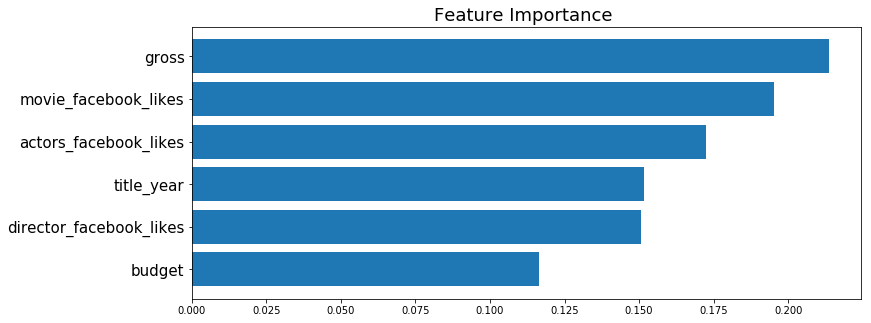

In [92]:
feature_importance=model.feature_importances_
sorted_importance = np.argsort(feature_importance)
pos=np.arange(len(sorted_importance))
plt.figure(figsize=(12,5))
plt.barh(pos, feature_importance[sorted_importance],align='center')
plt.yticks(pos, X.columns[sorted_importance],fontsize=15)
plt.title('Feature Importance ',fontsize=18)
plt.show()

### Add networkx

In [93]:
#copied from kaggle
X=test[['movie_facebook_likes','title_year','budget','gross','director_facebook_likes','actors_facebook_likes',
       'dir_deg_cent_x', 'dir_bet_cent_x', 
          'dir_page_rank_x','act1_deg_cent_y', 'act1_bet_cent_y', 'act1_page_rank_y','act2_deg_cent_x', 
        'act2_bet_cent_x', 'act2_page_rank_x','act3_deg_cent_y', 'act3_bet_cent_y', 
          'act3_page_rank_y']]
y=test['imdb_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [94]:
rf_2 = RandomForestRegressor()
preds_networked = rf_2.fit(X_train, y_train).predict(X_test)
np.sqrt(mean_squared_error(y_test, preds_networked))

0.8609245907925217

In [95]:
n_trees=200
model=ensemble.GradientBoostingRegressor(loss='ls',learning_rate=0.03,n_estimators=n_trees,max_depth=4)
model.fit(X_train,y_train)
pred=model.predict(X_test)
# error=model.loss_(y_test,pred) ##Loss function== Mean square error
# print("MSE:%.3f" % error)
np.sqrt(mean_squared_error(y_test,pred))

0.8191586648089421

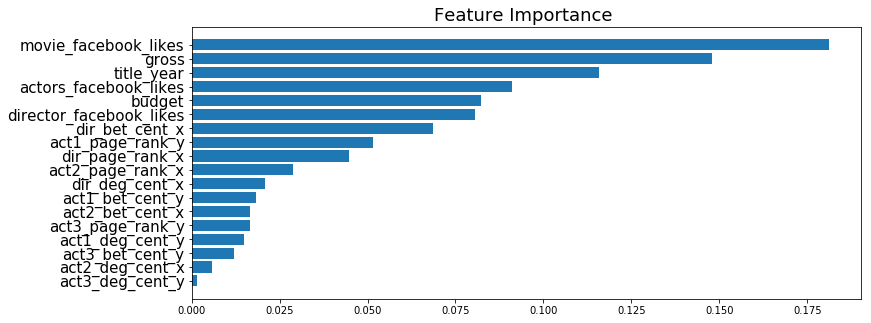

In [96]:
feature_importance=model.feature_importances_
sorted_importance = np.argsort(feature_importance)
pos=np.arange(len(sorted_importance))
plt.figure(figsize=(12,5))
plt.barh(pos, feature_importance[sorted_importance],align='center')
plt.yticks(pos, X.columns[sorted_importance],fontsize=15)
plt.title('Feature Importance ',fontsize=18)
plt.show()

In [97]:
#copied from kaggle
X=test[['movie_facebook_likes','title_year','budget','gross','director_facebook_likes','actors_facebook_likes',
       'dir_bet_cent_x', 'act1_page_rank_y']]
y=test['imdb_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [98]:
rf_2 = RandomForestRegressor()
preds_networked = rf_2.fit(X_train, y_train).predict(X_test)
np.sqrt(mean_squared_error(y_test, preds_networked))

0.8479719063499387

In [99]:
n_trees=200
model=ensemble.GradientBoostingRegressor(loss='ls',learning_rate=0.03,n_estimators=n_trees,max_depth=4)
model.fit(X_train,y_train)
pred=model.predict(X_test)
# error=model.loss_(y_test,pred) ##Loss function== Mean square error
# print("MSE:%.3f" % error)
np.sqrt(mean_squared_error(y_test,pred))

0.819704781310816

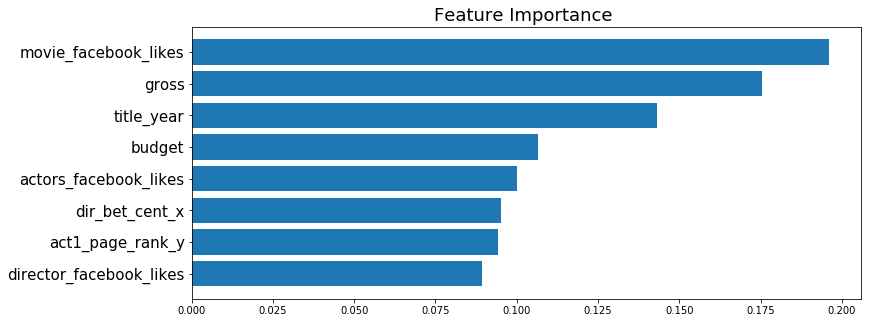

In [100]:
feature_importance=model.feature_importances_
sorted_importance = np.argsort(feature_importance)
pos=np.arange(len(sorted_importance))
plt.figure(figsize=(12,5))
plt.barh(pos, feature_importance[sorted_importance],align='center')
plt.yticks(pos, X.columns[sorted_importance],fontsize=15)
plt.title('Feature Importance ',fontsize=18)
plt.show()